In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import imghdr
import tensorflow as tf
from tensorflow.keras import models,layers

In [108]:
data_dir='/content/drive/MyDrive/Data/Xray reduced/train'

In [109]:
os.listdir(data_dir) #to folders inside the data_dir

['Non Fractured', 'Fractured']

In [ ]:
os.listdir(os.path.join(data_dir,'Fractured')) #to get images inside the folders

['IMG0003734.jpg',
 'IMG0002482.jpg',
 'IMG0002410.jpg',
 'IMG0003767.jpg',
 'IMG0002389.jpg',
 'IMG0002344.jpg',
 'IMG0000207.jpg',
 'IMG0001364.jpg',
 'IMG0002573.jpg',
 'IMG0002586.jpg',
 'IMG0002750.jpg',
 'IMG0002581.jpg',
 'IMG0004114.jpg',
 'IMG0003234.jpg',
 'IMG0002443.jpg',
 'IMG0001730.jpg',
 'IMG0002483.jpg',
 'IMG0002971.jpg',
 'IMG0001441.jpg',
 'IMG0002596.jpg',
 'IMG0002414.jpg',
 'IMG0002450.jpg',
 'IMG0003819.jpg',
 'IMG0003311.jpg',
 'IMG0002610.jpg',
 'IMG0002569.jpg',
 'IMG0002311.jpg',
 'IMG0003267.jpg',
 'IMG0000801.jpg',
 'IMG0003851.jpg',
 'IMG0002530.jpg',
 'IMG0000805.jpg',
 'IMG0003419.jpg',
 'IMG0002308.jpg',
 'IMG0003297.jpg',
 'IMG0003094.jpg',
 'IMG0004009.jpg',
 'IMG0002790.jpg',
 'IMG0001151.jpg',
 'IMG0003214.jpg',
 'IMG0003147.jpg',
 'IMG0002126.jpg',
 'IMG0002360.jpg',
 'IMG0003704.jpg',
 'IMG0003520.jpg',
 'IMG0002580.jpg',
 'IMG0003111.jpg',
 'IMG0000758.jpg',
 'IMG0003620.jpg',
 'IMG0002621.jpg',
 'IMG0001780.jpg',
 'IMG0004061.jpg',
 'IMG0002970

In [110]:
for image_class in os.listdir(data_dir):
  print(image_class)

Non Fractured
Fractured


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    print(image_path,'*',image)

/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000049.jpg * IMG0000049.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000196.jpg * IMG0000196.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000246.jpg * IMG0000246.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000312.jpg * IMG0000312.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0001341.jpg * IMG0001341.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000131.jpg * IMG0000131.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0001038.jpg * IMG0001038.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000224.jpg * IMG0000224.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000162.jpg * IMG0000162.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000085.jpg * IMG0000085.jpg
/content/drive/MyDrive/Data/Xray reduced/Non Fractured/IMG0000572.jpg * IMG0000572.jpg
/content/drive/MyDrive/Data/Xray reduced/No

In [3]:
img=cv2.imread(os.path.join(data_dir,'Fractured','IMG0003685.jpg'))
type(img)

numpy.ndarray

In [4]:
img.shape  #454 pixel heihgt 5616 pixel wide and 3 channels means a colored image

(454, 373, 3)

In [5]:
imghdr.what(os.path.join(data_dir,'Fractured','IMG0003685.jpg')) #toget image file type

'jpeg'

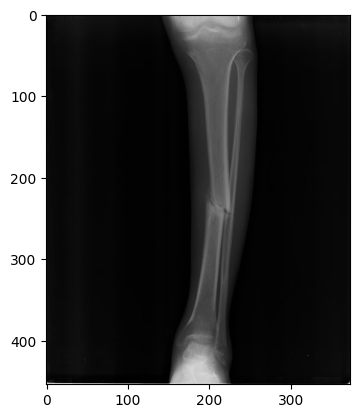

In [6]:
plt.imshow(img)

In [ ]:
image_exts=['jpeg']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('image not in list {}'.format(image_path))
        # os.remove(image_path)
    except Exception as e:
      print('issue with image {}'.format(image_path))

In [ ]:
tf.data.Dataset??

Object `tf.data.Dataset` not found.


In [ ]:
tf.keras.utils.image_dataset_from_directory??

Object `tf.keras.utils.image_dataset_from_directory` not found.


In [111]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1943 files belonging to 2 classes.


In [112]:
# data[0] #error

In [113]:
data_iterator=data.as_numpy_iterator() #loop through data

In [114]:
batch=data_iterator.next() #take one by one and make them to a batch size of 32

In [115]:
len(batch) #2 parts--> 1st is images from the directory 2nd part is

2

In [116]:
batch[0].shape #image as numpy arrays

(32, 256, 256, 3)

In [117]:
batch[1] #target

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

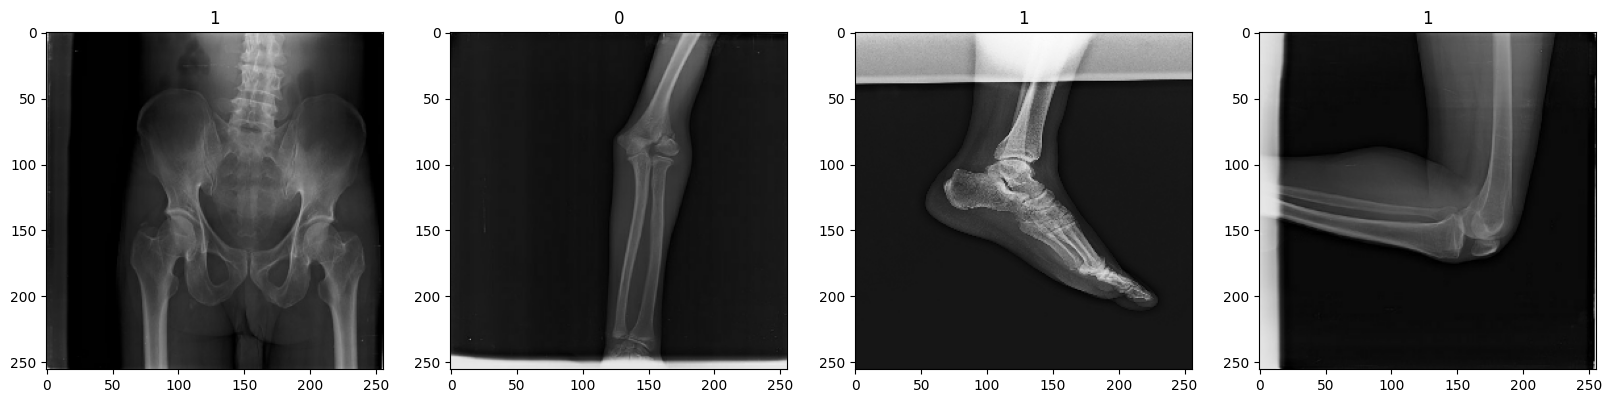

In [118]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [119]:
#preprocessing

In [120]:
data=data.map(lambda x,y:(x/255,y)) #y is target variables

In [121]:
data.as_numpy_iterator().next()[0].min()

0.0

In [122]:
data.as_numpy_iterator().next()[0].max()

1.0

In [123]:
#spilting
len(data)

61

In [124]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)+1

In [125]:
test_size+val_size+train_size

61

In [126]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [127]:
len(test)

7

Model Building

In [137]:
data_aug=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [146]:
# from tensorflow.keras import layers, models

# input_shape = (32, 256, 256, 3)
# n_classes = 1

# model = models.Sequential([
#     data_aug,
#     layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(256, 256, 3)),
#     layers.MaxPooling2D(),

#     layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.25),

#     layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.25),

#     layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.4),

#     layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.3),

#     layers.Flatten(),

#     layers.Dense(256, activation='relu'),
#     layers.Dense(n_classes, activation='sigmoid')
# ])


In [156]:
model=Sequential()

In [157]:
model.add(Conv2D(64,(3,3),1, activation='tanh',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),1, activation='tanh',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),1, activation='tanh',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),1, activation='tanh',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(16,(3,3),1, activation='tanh',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [158]:
model.layers[0].input_shape

(None, 256, 256, 3)

In [159]:
# model.build(input_shape=(256,256,3))

In [160]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [161]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 62, 62, 64)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 60, 60, 32)      

Train

In [162]:
logdir='logs'

In [163]:
tesnorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [164]:
# hist=model.fit_generator(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=10  # Adjust the number of epochs as needed
# )

In [165]:
hist=model.fit(train,epochs=30,validation_data=val,callbacks=[tesnorboard_callback])

Epoch 1/30
42/42 [==============================] - 33s 643ms/step - loss: 0.6705 - accuracy: 0.6124 - val_loss: 0.6516 - val_accuracy: 0.5938
Epoch 2/30
42/42 [==============================] - 37s 836ms/step - loss: 0.6374 - accuracy: 0.6525 - val_loss: 0.6263 - val_accuracy: 0.6589
Epoch 3/30
42/42 [==============================] - 31s 718ms/step - loss: 0.6278 - accuracy: 0.6600 - val_loss: 0.6099 - val_accuracy: 0.6667
Epoch 4/30
42/42 [==============================] - 31s 702ms/step - loss: 0.6075 - accuracy: 0.6830 - val_loss: 0.5944 - val_accuracy: 0.6641
Epoch 5/30
42/42 [==============================] - 30s 694ms/step - loss: 0.5886 - accuracy: 0.7046 - val_loss: 0.5896 - val_accuracy: 0.6641
Epoch 6/30
42/42 [==============================] - 31s 701ms/step - loss: 0.5775 - accuracy: 0.6949 - val_loss: 0.5993 - val_accuracy: 0.6823
Epoch 7/30
42/42 [==============================] - 30s 689ms/step - loss: 0.5503 - accuracy: 0.7128 - val_loss: 0.5738 - val_accuracy: 0.7109

In [188]:
model.save('Xraymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


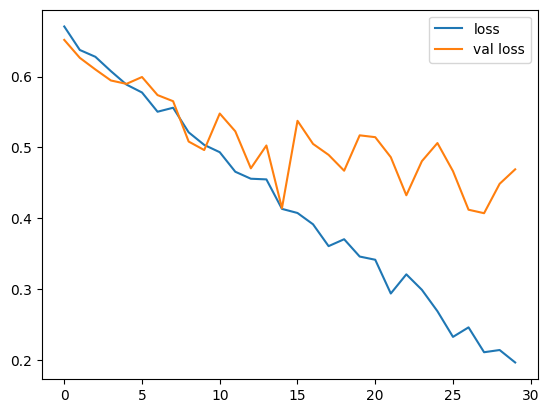

In [166]:
#plot
fig=plt.figure()
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

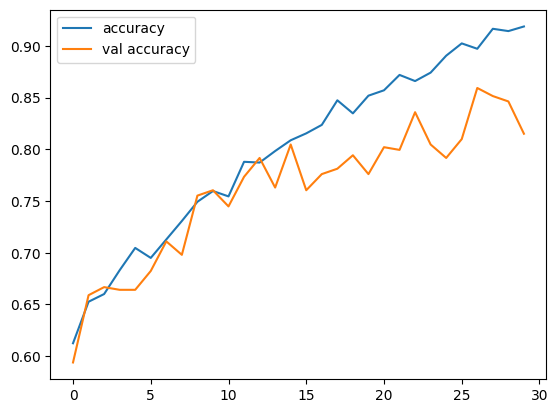

In [167]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

Evaluating Performance

In [179]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy,F1Score

In [180]:
prec=Precision()
rec=Recall()
bacc=BinaryAccuracy()
f1=F1Score()

In [183]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  yhat_flat = np.squeeze(yhat, axis=-1)

    # Expand dimensions to make y_true and y_pred 2D
  y = np.expand_dims(y, axis=-1)
  yhat_flat = np.expand_dims(yhat_flat, axis=-1)
  prec.update_state(y,yhat_flat)
  rec.update_state(y,yhat_flat)
  bacc.update_state(y,yhat_flat)
  # yhat_flat = np.squeeze(yhat, axis=-1)
  f1.update_state(y,yhat_flat)

1/1 [==============================] - 0s 30ms/step


In [184]:
print(f'Precision:{prec.result()},Recall:{rec.result()},Binary Acc:{bacc.result()}, F1Score:{f1.result()}')

Precision:0.8114285469055176,Recall:0.8022598624229431,Binary Acc:0.7562723755836487, F1Score:[0.7818697]


In [175]:
print(os.path.join(data_dir,'Test1','x.jpg'))


/content/drive/MyDrive/Data/Xray reduced/train/Test1/x.jpg


In [185]:
from sklearn.metrics import confusion_matrix

threshold = 0.5
true_labels = []
predicted_labels = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    yhat_flat = np.squeeze(yhat, axis=-1)
    y = np.expand_dims(y, axis=-1)
    yhat_flat = np.expand_dims(yhat_flat, axis=-1)
    prec.update_state(y, yhat_flat)
    rec.update_state(y, yhat_flat)
    bacc.update_state(y, yhat_flat)
    f1.update_state(y, yhat_flat)

    predicted_labels.extend((yhat_flat > threshold).astype(int).flatten())
    true_labels.extend(y.flatten())

conf_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_mat)


1/1 [==============================] - 0s 26ms/step
Confusion Matrix:
[[ 50  29]
 [ 14 122]]


In [186]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

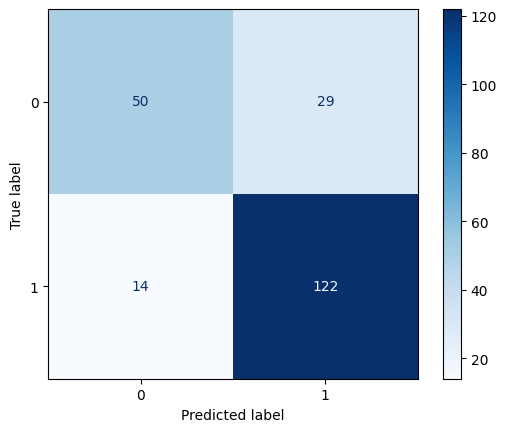

In [187]:
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap='Blues', values_format='d')

In [194]:
from keras.models import load_model
model=load_model('Xraymodel.h5')
def Predict(model,data_dir,imagename):
  img=cv2.imread(os.path.join(data_dir,imagename))
  img=img.astype(np.uint8)
  yhat=model.predict(np.expand_dims(resize/255,0))
  if yhat<0.5:
    return 'Fractured'
  else:
    return 'Non Fractured'
Predict(model,data_direc,'Copy of IMG0004376.jpg')

data_direc='folderpath'


1/1 [==============================] - 0s 94ms/step


'Non Fractured'

In [193]:
data_direc='/content/drive/MyDrive/Data/Xray reduced/Test1/'

In [177]:
img=cv2.imread(os.path.join(data_dir,'Test1','x.jpg'))
img=img.astype(np.uint8)
plt.imshow(img)
plt.show()

In [178]:
# resize=tf.image.resize(img,(256,256))
# plt.imshow(img)
# plt.show()

In [18]:
np.expand_dims(resize,0).shape #why this because shape of resized image is 256,256,3

(1, 256, 256, 3)

In [189]:
yhat=model.predict(np.expand_dims(resize/255,0))


1/1 [==============================] - 0s 322ms/step


In [190]:
yhat

array([[0.99946874]], dtype=float32)

Resnet

In [ ]:
from keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (256,256,3), include_top = False)


In [ ]:
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
resnetmodel=Sequential()

In [ ]:
resnetmodel.add(resnet50)

In [ ]:
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
resnetmodel.add(Flatten())
resnetmodel.add(Dense(units = 32, activation = "relu"))
resnetmodel.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
resnetmodel.add(Dropout(0.3))
resnetmodel.add(Dense(units = 1, activation = "sigmoid"))


In [ ]:
# resnetmodel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [ ]:
resnetmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten_6 (Flatten)         (None, 131072)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               16777344  
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 40342273 (153.89 MB)
Trainable params: 1

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
resnetmodel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [191]:
# train_generator = datagen.flow_from_directory(
#     traidn,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary'
# )

In [ ]:
hist=resnetmodel.fit(train,epochs=4,validation_data=val,callbacks=[tesnorboard_callback])

Epoch 1/4
44/44 [==============================] - 38s 704ms/step - loss: 2.9802 - accuracy: 0.6946 - val_loss: 0.4973 - val_accuracy: 0.8021
Epoch 2/4
44/44 [==============================] - 36s 763ms/step - loss: 0.4303 - accuracy: 0.7983 - val_loss: 0.4195 - val_accuracy: 0.8307
Epoch 3/4
44/44 [==============================] - 33s 730ms/step - loss: 0.3844 - accuracy: 0.8480 - val_loss: 0.3636 - val_accuracy: 0.8464
Epoch 4/4
44/44 [==============================] - 34s 735ms/step - loss: 0.3108 - accuracy: 0.8480 - val_loss: 0.3303 - val_accuracy: 0.8750


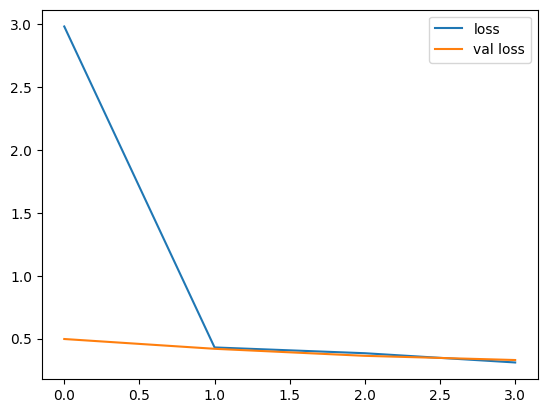

In [ ]:
#plot
fig=plt.figure()
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()